# Monte Carlo Estimation of Pi

## Introduction

The Monte Carlo method is a powerful computational technique that uses random sampling to obtain numerical results. One classic application is estimating the value of $\pi$ through a geometric probability argument.

## Mathematical Foundation

Consider a square with side length 2 centered at the origin, containing a unit circle of radius 1. The area ratio between these shapes provides our estimation framework:

$$A_{\text{circle}} = \pi r^2 = \pi$$

$$A_{\text{square}} = (2r)^2 = 4$$

The probability that a randomly selected point within the square falls inside the circle is:

$$P(\text{inside circle}) = \frac{A_{\text{circle}}}{A_{\text{square}}} = \frac{\pi}{4}$$

Therefore, by generating $N$ random points and counting how many fall within the circle ($N_{\text{inside}}$), we can estimate $\pi$ as:

$$\pi \approx 4 \cdot \frac{N_{\text{inside}}}{N}$$

## Convergence Analysis

By the Law of Large Numbers, the estimate converges to the true value as $N \to \infty$. The standard error of the Monte Carlo estimate decreases as:

$$\sigma_{\hat{\pi}} \propto \frac{1}{\sqrt{N}}$$

This $O(N^{-1/2})$ convergence rate is characteristic of Monte Carlo methods.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
def monte_carlo_pi(n_samples):
    """
    Estimate pi using Monte Carlo method.
    
    Parameters:
    -----------
    n_samples : int
        Number of random points to generate
    
    Returns:
    --------
    tuple : (pi_estimate, x_coords, y_coords, inside_mask)
    """
    # Generate random points in [-1, 1] x [-1, 1]
    x = np.random.uniform(-1, 1, n_samples)
    y = np.random.uniform(-1, 1, n_samples)
    
    # Check if points are inside the unit circle: x^2 + y^2 <= 1
    distances_squared = x**2 + y**2
    inside = distances_squared <= 1
    
    # Estimate pi
    n_inside = np.sum(inside)
    pi_estimate = 4 * n_inside / n_samples
    
    return pi_estimate, x, y, inside

# Test with a small sample
test_pi, _, _, _ = monte_carlo_pi(1000)
print(f"Quick test with 1,000 samples: pi ≈ {test_pi:.4f}")
print(f"True value of pi: {np.pi:.4f}")
print(f"Absolute error: {abs(test_pi - np.pi):.4f}")

Quick test with 1,000 samples: pi ≈ 3.0960
True value of pi: 3.1416
Absolute error: 0.0456


In [3]:
def convergence_analysis(max_samples=100000, n_points=100):
    """
    Analyze convergence of Monte Carlo pi estimation.
    
    Parameters:
    -----------
    max_samples : int
        Maximum number of samples to use
    n_points : int
        Number of data points to plot
    
    Returns:
    --------
    tuple : (sample_sizes, estimates, errors)
    """
    sample_sizes = np.logspace(1, np.log10(max_samples), n_points, dtype=int)
    sample_sizes = np.unique(sample_sizes)  # Remove duplicates
    
    estimates = []
    errors = []
    
    for n in sample_sizes:
        pi_est, _, _, _ = monte_carlo_pi(n)
        estimates.append(pi_est)
        errors.append(abs(pi_est - np.pi))
    
    return sample_sizes, np.array(estimates), np.array(errors)

# Run convergence analysis
sample_sizes, estimates, errors = convergence_analysis()
print(f"Convergence analysis complete with {len(sample_sizes)} data points")

Convergence analysis complete with 99 data points


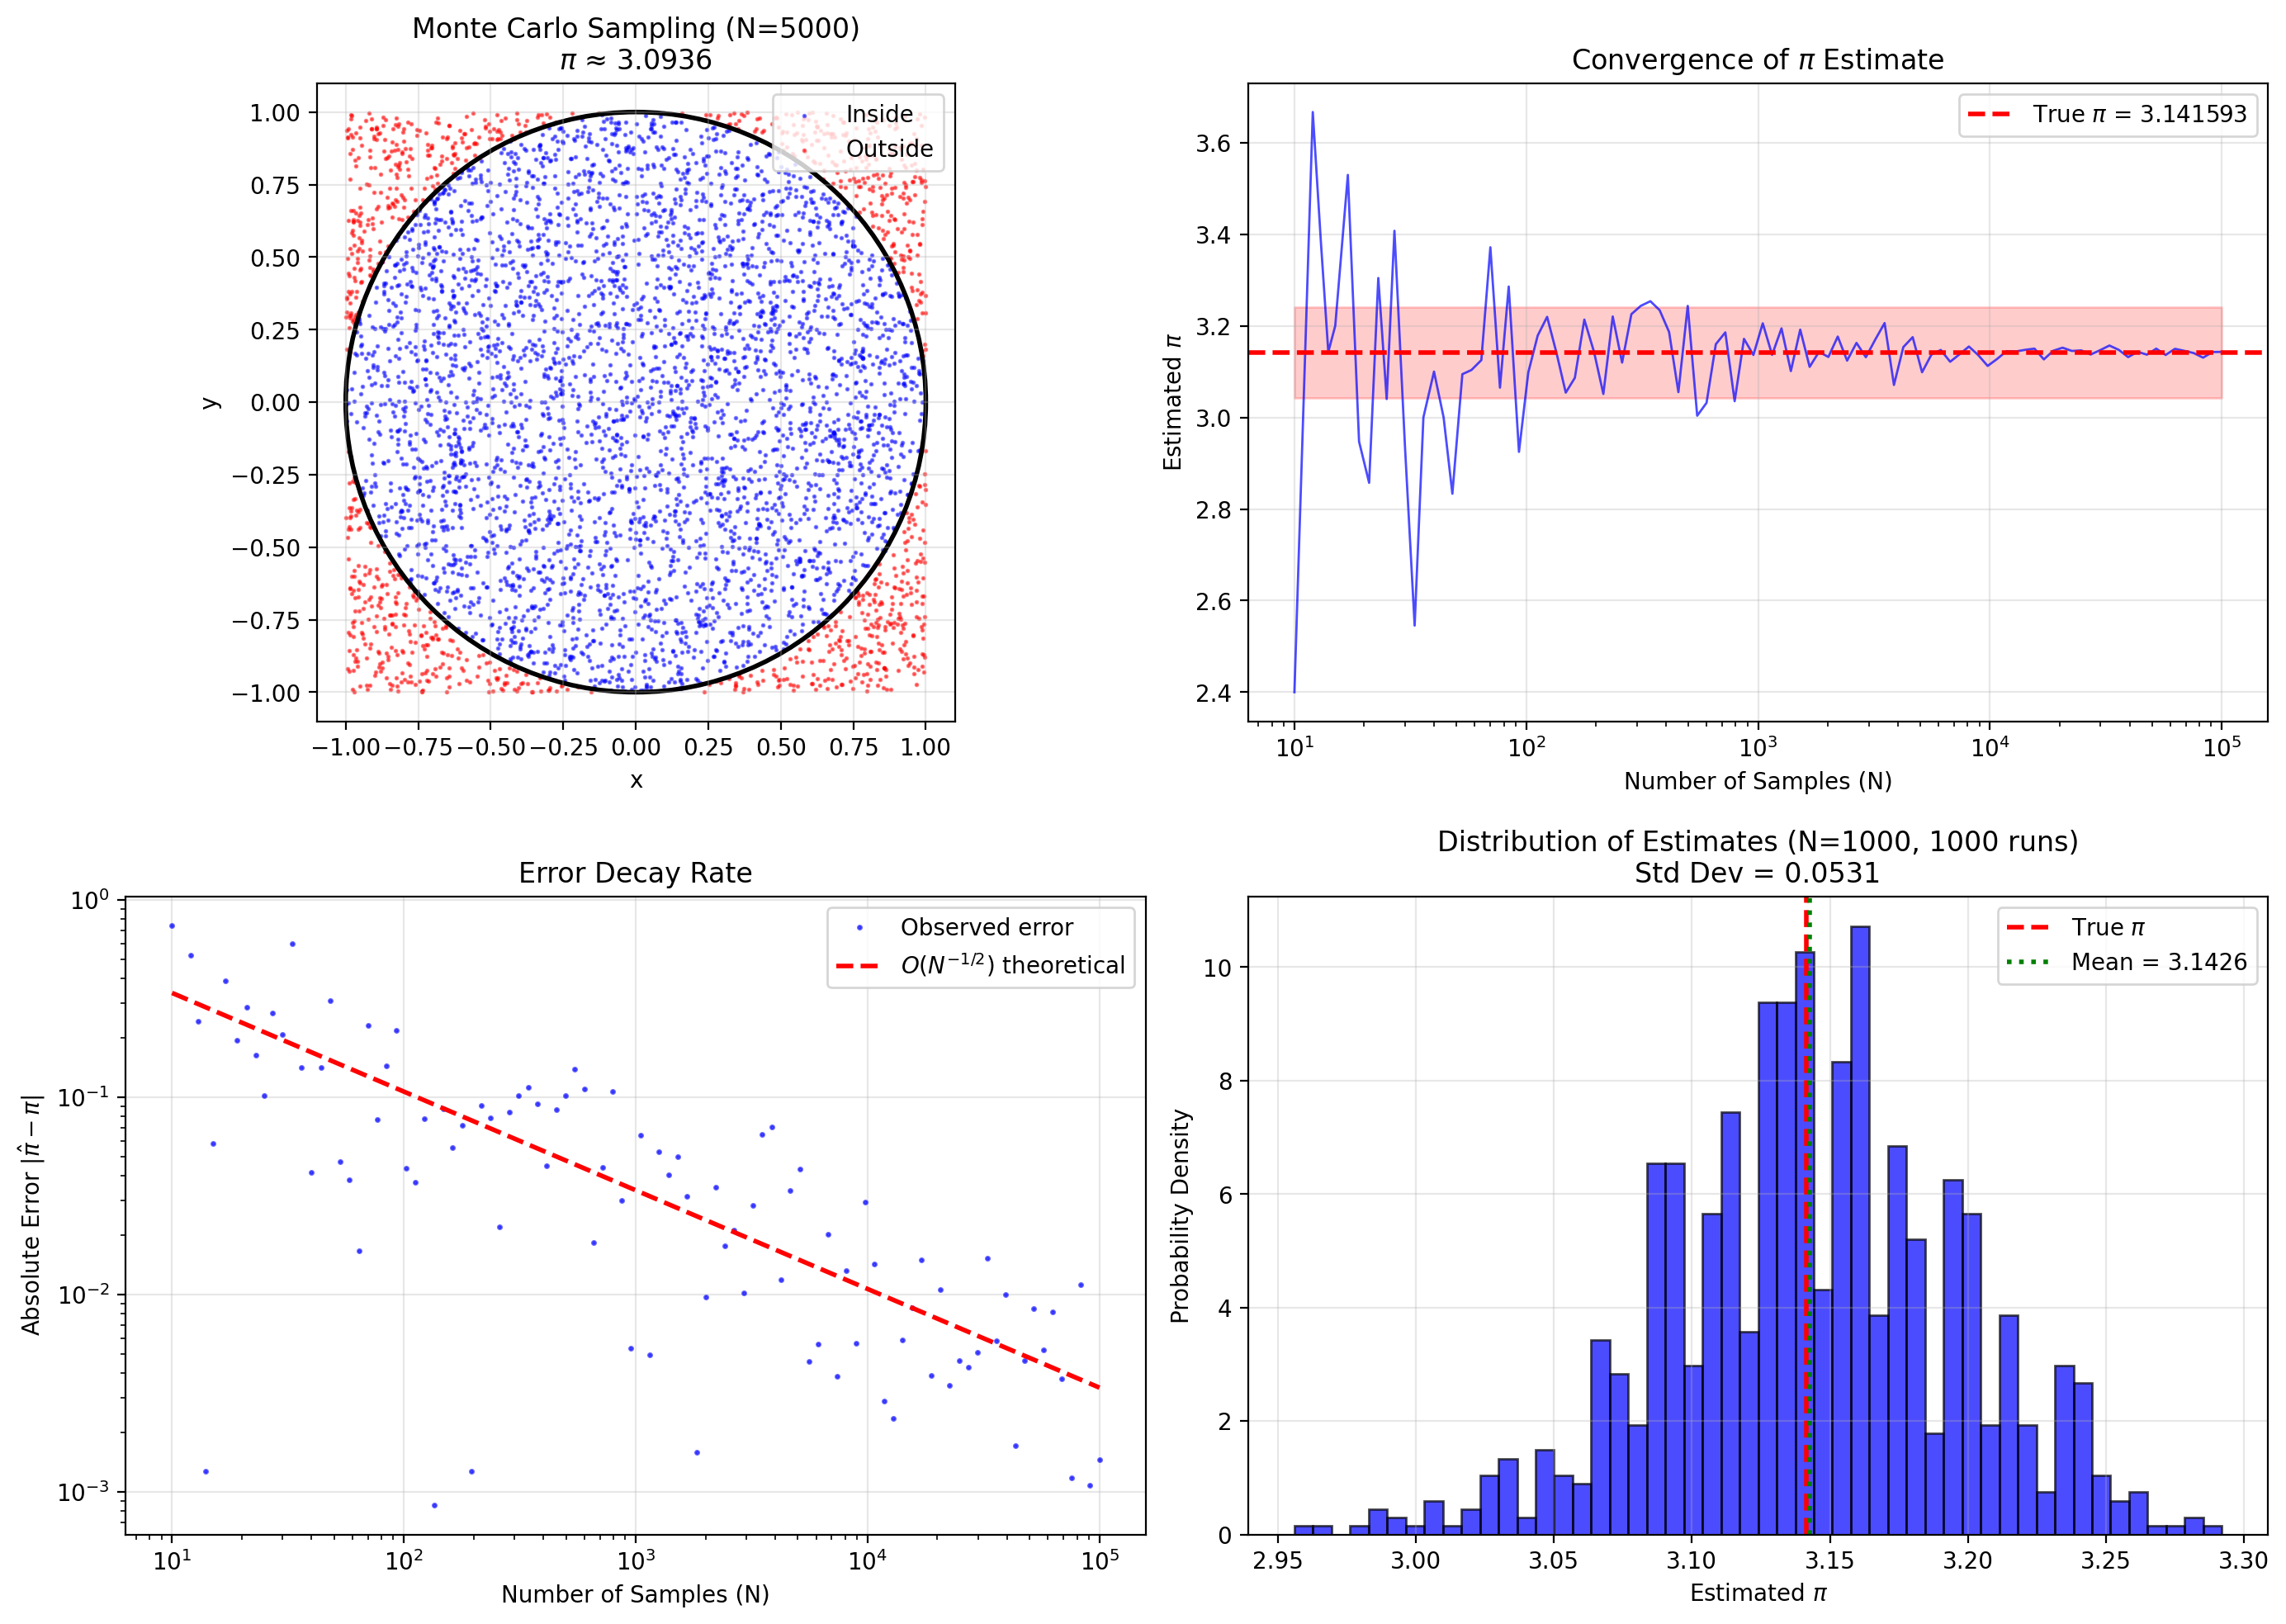


Plot saved to 'plot.png'


In [4]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 10))

# Plot 1: Monte Carlo visualization with 5000 points
ax1 = fig.add_subplot(2, 2, 1)
n_visual = 5000
pi_est, x, y, inside = monte_carlo_pi(n_visual)

# Plot points - inside circle in blue, outside in red
ax1.scatter(x[inside], y[inside], c='blue', s=1, alpha=0.5, label='Inside')
ax1.scatter(x[~inside], y[~inside], c='red', s=1, alpha=0.5, label='Outside')

# Draw the unit circle
circle = Circle((0, 0), 1, fill=False, color='black', linewidth=2)
ax1.add_patch(circle)

ax1.set_xlim(-1.1, 1.1)
ax1.set_ylim(-1.1, 1.1)
ax1.set_aspect('equal')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(f'Monte Carlo Sampling (N={n_visual})\n$\\pi$ ≈ {pi_est:.4f}')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Convergence of estimate
ax2 = fig.add_subplot(2, 2, 2)
ax2.semilogx(sample_sizes, estimates, 'b-', linewidth=1, alpha=0.7)
ax2.axhline(y=np.pi, color='r', linestyle='--', linewidth=2, label=f'True $\\pi$ = {np.pi:.6f}')
ax2.fill_between(sample_sizes, np.pi - 0.1, np.pi + 0.1, alpha=0.2, color='red')
ax2.set_xlabel('Number of Samples (N)')
ax2.set_ylabel('Estimated $\\pi$')
ax2.set_title('Convergence of $\\pi$ Estimate')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Error decay (log-log)
ax3 = fig.add_subplot(2, 2, 3)
ax3.loglog(sample_sizes, errors, 'b.', markersize=3, alpha=0.6, label='Observed error')

# Theoretical 1/sqrt(N) convergence
theoretical_error = 1.0 / np.sqrt(sample_sizes)
# Scale to match observed errors
scale_factor = np.median(errors * np.sqrt(sample_sizes))
ax3.loglog(sample_sizes, scale_factor / np.sqrt(sample_sizes), 'r--', 
           linewidth=2, label=r'$O(N^{-1/2})$ theoretical')

ax3.set_xlabel('Number of Samples (N)')
ax3.set_ylabel('Absolute Error $|\\hat{\\pi} - \\pi|$')
ax3.set_title('Error Decay Rate')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Distribution of estimates from multiple runs
ax4 = fig.add_subplot(2, 2, 4)
n_runs = 1000
samples_per_run = 1000
pi_estimates = [monte_carlo_pi(samples_per_run)[0] for _ in range(n_runs)]

ax4.hist(pi_estimates, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
ax4.axvline(x=np.pi, color='red', linestyle='--', linewidth=2, label=f'True $\\pi$')
ax4.axvline(x=np.mean(pi_estimates), color='green', linestyle=':', 
            linewidth=2, label=f'Mean = {np.mean(pi_estimates):.4f}')

# Add standard deviation annotation
std_pi = np.std(pi_estimates)
ax4.set_xlabel('Estimated $\\pi$')
ax4.set_ylabel('Probability Density')
ax4.set_title(f'Distribution of Estimates (N={samples_per_run}, {n_runs} runs)\nStd Dev = {std_pi:.4f}')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('monte_carlo_pi_estimation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

In [5]:
# Final high-precision estimate
final_n = 1000000
final_pi, _, _, _ = monte_carlo_pi(final_n)

print("="*50)
print("FINAL RESULTS")
print("="*50)
print(f"Number of samples: {final_n:,}")
print(f"Monte Carlo estimate: {final_pi:.6f}")
print(f"True value of pi:     {np.pi:.6f}")
print(f"Absolute error:       {abs(final_pi - np.pi):.6f}")
print(f"Relative error:       {100*abs(final_pi - np.pi)/np.pi:.4f}%")
print("="*50)

# Theoretical standard error
theoretical_std = np.sqrt(np.pi * (4 - np.pi) / final_n)
print(f"\nTheoretical std error: {theoretical_std:.6f}")
print(f"Expected 95% CI: [{np.pi - 1.96*theoretical_std:.6f}, {np.pi + 1.96*theoretical_std:.6f}]")

FINAL RESULTS
Number of samples: 1,000,000
Monte Carlo estimate: 3.139964
True value of pi:     3.141593
Absolute error:       0.001629
Relative error:       0.0518%

Theoretical std error: 0.001642
Expected 95% CI: [3.138374, 3.144811]


## Conclusion

This notebook demonstrated the Monte Carlo method for estimating $\pi$ through:

1. **Geometric Probability**: Using the ratio of circle area to square area
2. **Random Sampling**: Generating uniform random points and checking inclusion
3. **Convergence Analysis**: Verifying the theoretical $O(N^{-1/2})$ error decay
4. **Statistical Distribution**: Showing the Central Limit Theorem in action

The Monte Carlo method, while simple for this application, forms the foundation for solving complex integration problems in higher dimensions where analytical solutions are intractable.